In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load  Dataset

In [3]:
df=pd.read_csv('C:\\Users\\RANA ASIM\\Pictures\\Data Visualization\\Datasets\\archive (3)\\student_info.csv')
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [4]:
df.shape

(200, 2)

In [5]:
#To gain insights
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


Text(0, 0.5, 'Student Marks')

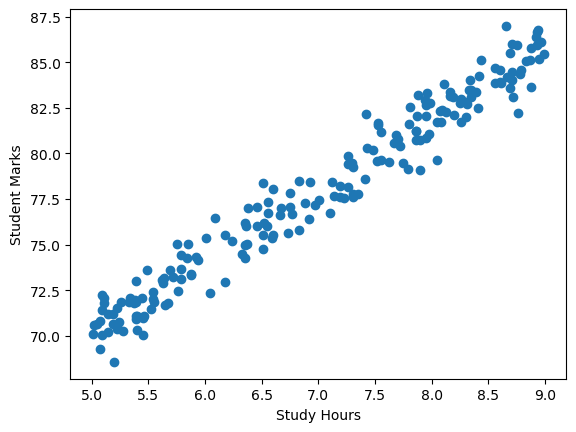

In [7]:
plt.scatter(x=df.study_hours, y=df.student_marks)
plt.xlabel('Study Hours')
plt.ylabel('Student Marks')

# Prepare Data for Machine learning Algorithm 

# Data Cleaning

In [8]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [9]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [10]:
dff=df.fillna(df.mean())
dff.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [11]:
dff.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [12]:
#Data Split

In [13]:
X=dff.drop('student_marks',axis=1)
y=dff['student_marks']
print('shape of X=',X.shape)
print('shape of y=',y.shape)

shape of X= (200, 1)
shape of y= (200,)


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=51)
print('sahpe of X_train',X_train.shape)
print('sahpe of y_train',y_train.shape)
print('sahpe of X_test',X_test.shape)
print('sahpe of y_test',y_test.shape)

sahpe of X_train (160, 1)
sahpe of y_train (160,)
sahpe of X_test (40, 1)
sahpe of y_test (40,)


# Select Model And Train

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
#to check the value which model learn(m value)
lr.coef_

array([3.93571802])

In [17]:
#C value
lr.intercept_

50.44735503694244

In [18]:
#Just For Knowledge
m=3.93
c=50.44
y=m*4+c
y

66.16

In [19]:
lr.predict([[4]])[0].round(2)

D:\Anaconda jupyter\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.19

# Model Testing

In [20]:
pred=lr.predict(X_test)
pred

array([83.11381458, 78.9025963 , 84.57003024, 85.82946001, 84.72745896,
       80.75238377, 72.84159055, 71.66087515, 73.23516235, 71.66087515,
       73.47130543, 76.38373677, 73.23516235, 73.58937697, 82.95638585,
       70.40144538, 73.23516235, 78.74516758, 75.55723598, 82.68088559,
       76.65923703, 70.48015974, 74.77009238, 77.98143645, 85.59331693,
       82.56281405, 76.42309395, 85.0423164 , 78.39095296, 81.38209865,
       81.73631327, 83.15317176, 82.20859943, 81.10659839, 73.58937697,
       71.1492318 , 71.89701823, 81.53952737, 72.60544747, 71.93637541])

In [21]:
pd.DataFrame(np.c_[X_test,y_test,pred],columns=['Study_hours','Student_marks_original','Student_marks_predicted'])

,Study_hours,Student_marks_original,Student_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


# Fine-Tune Model

In [22]:
#To check accuracy
lr.score(X_test,y_test)

0.9514124242154464

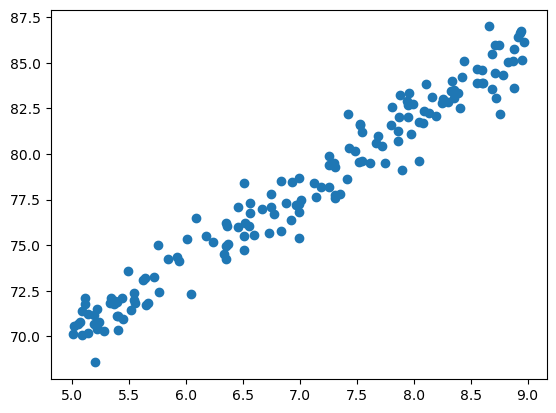

In [23]:
plt.scatter(X_train,y_train)

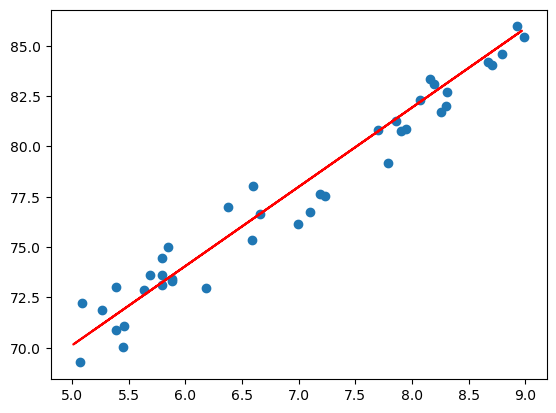

In [24]:
#How our model actually looks like
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color='r')

# Save ML Model

In [25]:
import joblib
joblib.dump(lr,'Student Mark Predictor_Model.pkl')

['Student Mark Predictor_Model.pkl']

In [27]:
#To check
model=joblib.load('Student Mark Predictor_Model.pkl')

In [31]:
model.predict([[5]])[0].round(2)

D:\Anaconda jupyter\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.13